# **Simulazione 10**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
from sklearn import preprocessing
import random

In [3]:
n_obs = 7500
n_groups = 10  # number of levels
n_per_group = n_obs/n_groups  # number of observations per level

# creazione della categorica relativa ai gruppi
group_ids = np.repeat(np.arange(1, n_groups + 1), n_per_group)

# probabilità di ciascun cluster di osservazioni
w = [0.4, 0.3, 0.3]

In [4]:
# random intercept
prob = np.repeat(1/n_groups, n_groups)
interc_1 = np.random.multinomial(n_groups, prob)
interc_1 = np.minimum(interc_1, 1) # fisso il numero massimo di categorie ottenute (2 + 1)
interc_2 = np.random.multinomial(n_groups, prob)
interc_2 = np.minimum(interc_2, 2)
interc_3 = np.random.multinomial(n_groups, prob)
interc_3 = np.minimum(interc_3, 2)

In [5]:
# covariate fisse estratte da una normale
mean_1 = [-10,-10]
cov_1 = np.array([[0.7, 0.5], [0.5, 3]])

mean_2 = [0,0]
cov_2 = np.array([[2, -1], [-1, 3]])

mean_3 = [0,-12]
cov_3 = np.array([[0.5, 0.2], [0.2, 1]])

data_1 = np.random.multivariate_normal(mean_1, cov_1, int(w[0] * n_obs))
data_2 = np.random.multivariate_normal(mean_2, cov_2, int(w[1] * n_obs))
data_3 = np.random.multivariate_normal(mean_3, cov_3, int(w[2] * n_obs))
data = np.vstack((data_1, data_2, data_3)) # combina i dati

# Crea un DataFrame
data = pd.DataFrame(data, columns=['x1', 'x2'])

# covariata categorica
categorie = ["A", "B"]
prob_1 = [0.5,0.5]
prob_2 = [0.3,0.7]
prob_3 = [0.6, 0.4]
cov_cat_1 = np.random.choice(categorie, size=int(w[0] * n_obs), p=prob_1)
cov_cat_2 = np.random.choice(categorie, size=int(w[1] * n_obs), p=prob_2)
cov_cat_3 = np.random.choice(categorie, size=int(w[2] * n_obs), p=prob_3)
cov_cat = np.concatenate((cov_cat_1, cov_cat_2, cov_cat_3)) # combina i dati
data['cat'] = cov_cat

# Aggiungi le colonne 'level' e 'latent'
np.random.shuffle(group_ids)
data['group'] = group_ids
data['cluster'] = np.repeat(np.arange(1, len(w) + 1), [int(w[i] * n_obs) for i in range(len(w))])

# Riordina le colonne
data = data[['group', 'cluster', 'x1', 'x2','cat']]
data['cat'] = data['cat'].astype('category')

In [6]:
data

,group,cluster,x1,x2,cat
0,7,1,-10.953066,-11.296606,A
1,3,1,-9.374306,-10.582228,B
2,7,1,-8.731508,-7.619111,B
3,4,1,-10.207182,-10.120231,B
4,7,1,-9.144825,-9.148374,B
...,...,...,...,...,...
7495,2,3,-0.776706,-11.235276,B
7496,2,3,-1.767716,-13.161728,A
7497,1,3,-0.796145,-13.228959,A
7498,9,3,0.656675,-11.510990,B


In [7]:
data['x1'] = preprocessing.scale(data.x1)
data['x2'] = preprocessing.scale(data.x2)

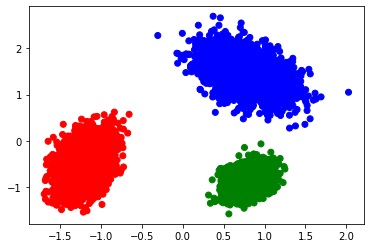

In [8]:
col = []
for i in range(n_obs):
  if data['cluster'][i]== 1 :
    col.append('r')
  elif data['cluster'][i]== 2 :
    col.append('b')
  else :
    col.append('g')
plt.scatter(data['x1'], data['x2'], color=col)
plt.savefig('cluster.png', bbox_inches='tight')

In [9]:
data = pd.get_dummies(data, columns=['cat'], drop_first=True)
data['cat_B'] = data['cat_B'].astype(int)

In [10]:
lin_pred = []
y = []

for i in range(n_obs):
  if data['cluster'][i] == 1:
    lin_pred.append(interc_1[data['group'][i] - 1] + 2 * data['x1'][i] - 0.4 * data['x2'][i] + 2 * data['cat_B'][i])
  if data['cluster'][i] == 2:
    lin_pred.append(interc_2[data['group'][i] - 1] + 1.8 * data['x1'][i] - 0.6 * data['x2'][i] - 2 * data['cat_B'][i] )
  if data['cluster'][i] == 3:
    lin_pred.append(interc_3[data['group'][i] - 1] - 1.5 * data['x1'][i] - 0.4 * data['x2'][i] - 0.1 * data['cat_B'][i] )
  prob = 1 / (1 + np.exp(-lin_pred[i]))
  y.append(np.random.binomial(1, prob))

data['lin_pred'] = lin_pred
data['y'] = y

In [11]:
np.sum(data['y'][data['cluster']==3])

1146

In [12]:
len(data[data['cluster']==3]['group'])

2250

In [13]:
data

,group,cluster,x1,x2,cat_B,lin_pred,y
0,7,1,-1.391274,-0.702992,0,-1.501351,1
1,3,1,-1.074716,-0.567810,1,0.077692,1
2,7,1,-0.945828,-0.007094,1,1.111182,1
3,4,1,-1.241716,-0.480385,1,0.708721,1
4,7,1,-1.028702,-0.296479,1,1.061187,1
...,...,...,...,...,...,...,...
7495,2,3,0.649194,-0.691387,1,1.202764,1
7496,2,3,0.450486,-1.055932,0,1.746644,1
7497,1,3,0.645296,-1.068655,0,0.459517,1
7498,9,3,0.936602,-0.743561,1,-0.207479,0


In [14]:
data['group'][data['cluster']==1].unique()

array([ 7,  3,  4,  1,  9,  8,  5,  2, 10,  6])

**Fit di tutto l'algoritmo**

In [14]:
import numdifftools

In [15]:
from algo_full import Algo_full 

In [16]:
params, log_l, z, iter = Algo_full(data = data, y = data['y'], C = 3,
                             U = data[['x1','x2']], V = data['cat_B'], num_fix = 3,
                             num_group = n_groups, alpha = 0.01, mod = 'B',
                             num_obs_groups = np.repeat(n_per_group,n_groups),
                             group_name = 'group', name_fix = ['x1','x2','cat_B'], max_iter=20, perc_collasso=0.05, y_name='y')

2.25600027864542e-65
1.1352423400187115e-63
1.1352423400187261e-63
1.1352423403806149e-63
1.1352443896176003e-63
1.1352571478939945e-63
1.1401535586503349e-63
1.1401535586503349e-63
1.1401535586688503e-63
1.1421870130245285e-63
1.5410230956145253e-61
4.99654760028983e-60
4.99654760159341e-60
4.996547623168892e-60
4.996547843976677e-60
4.996951585443501e-60
5.036383802140616e-60
5.036383802140623e-60
5.036383802277733e-60
5.036550714643411e-60
1.4743950879296084e-61
4.734820075896851e-60
4.73482007770757e-60
4.734820110246406e-60
4.734820344233886e-60
4.7355194770747976e-60
4.788445036319387e-60
4.7884450363193927e-60
4.788445036464016e-60
4.788692719020757e-60
1.4267478050105924e-61
4.563276103424314e-60
4.5632761055753714e-60
4.563276146395054e-60
4.563276380967308e-60
4.564253952710988e-60
4.628066891904659e-60
4.628066891904663e-60
4.6280668920430255e-60
4.628378884497735e-60
1.3760785205379079e-61
4.38428657390672e-60
4.384286576280722e-60
4.3842866231167907e-60
4.384286853512244e-

[ 1.12274 -0.27244]
D_triu
[[    nan 1.39518]
 [    nan     nan]]
I move on to the check other masses
1.2040159311576999e-61
3.7821130379112016e-60
3.782113039205534e-60
3.782113102649474e-60
3.782113269811114e-60
3.783962209981798e-60
3.870290534489243e-60
3.870290534489247e-60
3.8702905346636265e-60
3.8705647163926464e-60
[ 1.12961 -0.26565]
D_triu
[[    nan 1.39527]
 [    nan     nan]]
I move on to the check other masses
1.1995139319094355e-61
3.7665916301042287e-60
3.766591631400205e-60
3.766591695232712e-60
3.76659186172184e-60
3.768459275682965e-60
3.855144604001911e-60
3.855144604001915e-60
3.8551446041758264e-60
3.855419519342427e-60
[ 1.13437 -0.26092]
D_triu
[[    nan 1.39529]
 [    nan     nan]]
I move on to the check other masses
1.1963882178912882e-61
3.755876151746585e-60
3.7558761530429944e-60
3.7558762171373543e-60
3.7558763832180256e-60
3.757756663701517e-60
3.844687697914493e-60
3.844687697914497e-60
3.84468769808809e-60
3.844963289646974e-60
[ 1.13753 -0.25773]
D_tri

[ 2.14198e+00 -8.77840e-04  1.07018e+00  1.07021e+00  2.14194e+00
  2.14196e+00]
D_triu
[[        nan 2.14286e+00 1.07180e+00 1.07177e+00 3.30290e-05 1.91121e-05]
 [        nan         nan 1.07106e+00 1.07109e+00 2.14282e+00 2.14284e+00]
 [        nan         nan         nan 2.98618e-05 1.07177e+00 1.07178e+00]
 [        nan         nan         nan         nan 1.07174e+00 1.07175e+00]
 [        nan         nan         nan         nan         nan 1.39169e-05]
 [        nan         nan         nan         nan         nan         nan]]
7.552147527349808e-56
7.552395416210647e-56
2.433801996731009e-48
2.4338405311985625e-48
2.4338405312060893e-48
1.3913918965104073e-45
1.3914959553093723e-45
1.6837703690659447e-45
1.683770451530086e-45
2.882067427694272e-45
[ 2.14198e+00 -8.77840e-04  1.07018e+00  1.07021e+00  2.14196e+00]
D_triu
[[        nan 2.14286e+00 1.07180e+00 1.07177e+00 2.05151e-05]
 [        nan         nan 1.07106e+00 1.07109e+00 2.14283e+00]
 [        nan         nan         na

[1.60267 1.60247 2.61886 2.61883 2.61888 2.61886 0.58721]
D_triu
[[        nan 1.94409e-04 1.01620e+00 1.01617e+00 1.01622e+00 1.01619e+00
  1.01546e+00]
 [        nan         nan 1.01639e+00 1.01636e+00 1.01641e+00 1.01639e+00
  1.01526e+00]
 [        nan         nan         nan 2.87815e-05 1.98851e-05 4.58727e-06
  2.03166e+00]
 [        nan         nan         nan         nan 4.86666e-05 2.41943e-05
  2.03163e+00]
 [        nan         nan         nan         nan         nan 2.44724e-05
  2.03168e+00]
 [        nan         nan         nan         nan         nan         nan
  2.03165e+00]
 [        nan         nan         nan         nan         nan         nan
          nan]]
1.604283030951743e-66
2.9977566419745987e-51
2.9983848065723275e-51
2.9984386024158265e-51
2.9984386477942635e-51
2.998438647851356e-51
2.998438647851356e-51
2.998438647851356e-51
2.998438647851356e-51
2.998438647851831e-51
[1.66158 1.66146 2.67864 2.67862 2.67867 0.64522]
D_triu
[[        nan 1.20576e-04 1.01

[1.83617 2.85595 0.81706]
D_triu
[[    nan 1.01979 1.01911]
 [    nan     nan 2.03889]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.01979     nan]
 [    nan     nan 2.03889]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 2.03889]
 [    nan     nan     nan]]
I move on to the check other masses
1.3814138766632975e-66
3.871425522773556e-51
3.872113347556806e-51
3.872169056168078e-51
3.8721691045644326e-51
3.8721691046237876e-51
3.8721691046237876e-51
3.8721691046237876e-51
3.8721691046237876e-51
3.872169104624283e-51
[1.83787 2.8577  0.81873]
D_triu
[[    nan 1.01982 1.01914]
 [    nan     nan 2.03896]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.01982     nan]
 [    nan     nan 2.03896]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 2.03896]
 [    nan     nan     nan]]
I move o

[ 1.30336  1.05527 -0.29663 -0.29665  1.30329  1.30326]
D_triu
[[        nan 2.48091e-01 1.59999e+00 1.60001e+00 7.33327e-05 1.01072e-04]
 [        nan         nan 1.35190e+00 1.35192e+00 2.48017e-01 2.47990e-01]
 [        nan         nan         nan 2.73448e-05 1.59991e+00 1.59989e+00]
 [        nan         nan         nan         nan 1.59994e+00 1.59991e+00]
 [        nan         nan         nan         nan         nan 2.77389e-05]
 [        nan         nan         nan         nan         nan         nan]]
1.231507976326101e-61
3.8789717281575134e-60
3.8789717299681545e-60
3.878971790462215e-60
3.878971990020918e-60
3.880736310960409e-60
3.9655045351532646e-60
3.9655045351532685e-60
3.965504535303555e-60
3.9658613760873887e-60
[ 1.3098   1.05584 -0.28567  1.30972  1.30976]
D_triu
[[        nan 2.53958e-01 1.59546e+00 7.34568e-05 3.74045e-05]
 [        nan         nan 1.34151e+00 2.53884e-01 2.53920e-01]
 [        nan         nan         nan 1.59539e+00 1.59543e+00]
 [        nan     

[-1.32535e-03  1.07095e+00  1.07096e+00  2.14450e+00  1.07093e+00
 -3.44684e-04 -1.68508e-03 -1.68641e-03]
D_triu
[[        nan 1.07228e+00 1.07229e+00 2.14583e+00 1.07226e+00 9.80661e-04
  3.59731e-04 3.61061e-04]
 [        nan         nan 9.82186e-06 1.07355e+00 2.11384e-05 1.07130e+00
  1.07264e+00 1.07264e+00]
 [        nan         nan         nan 1.07354e+00 3.09603e-05 1.07131e+00
  1.07265e+00 1.07265e+00]
 [        nan         nan         nan         nan 1.07357e+00 2.14485e+00
  2.14619e+00 2.14619e+00]
 [        nan         nan         nan         nan         nan 1.07128e+00
  1.07262e+00 1.07262e+00]
 [        nan         nan         nan         nan         nan         nan
  1.34039e-03 1.34172e-03]
 [        nan         nan         nan         nan         nan         nan
          nan 1.32958e-06]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
7.505169277582019e-56
7.505415570247002e-56
2.4383776699610968e-48
2.43841623

[0.50056 2.53168 2.53164 2.53169 2.5317  2.53167 2.53168 1.51332]
D_triu
[[        nan 2.03112e+00 2.03109e+00 2.03114e+00 2.03114e+00 2.03111e+00
  2.03112e+00 1.01276e+00]
 [        nan         nan 3.76331e-05 1.09175e-05 1.81732e-05 1.36038e-05
  4.77461e-06 1.01836e+00]
 [        nan         nan         nan 4.85505e-05 5.58063e-05 2.40292e-05
  3.28585e-05 1.01833e+00]
 [        nan         nan         nan         nan 7.25577e-06 2.45213e-05
  1.56921e-05 1.01838e+00]
 [        nan         nan         nan         nan         nan 3.17771e-05
  2.29478e-05 1.01838e+00]
 [        nan         nan         nan         nan         nan         nan
  8.82924e-06 1.01835e+00]
 [        nan         nan         nan         nan         nan         nan
          nan 1.01836e+00]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
1.6987834160374618e-66
2.785142630147344e-51
2.785751529272049e-51
2.7858052401591556e-51
2.785805281965658e-51
2.7858

[0.79151 2.83163 1.80896]
D_triu
[[    nan 2.04012 1.01745]
 [    nan     nan 1.02267]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.04012     nan]
 [    nan     nan 1.02267]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.04012     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
1.426488259015033e-66
3.8902705723648483e-51
3.8909593571075375e-51
3.8910159322598747e-51
3.8910159780917196e-51
3.8910159781534954e-51
3.891015978153496e-51
3.891015978153496e-51
3.891015978153496e-51
3.8910159781539785e-51
[0.79336 2.83357 1.8109 ]
D_triu
[[    nan 2.0402  1.01754]
 [    nan     nan 1.02267]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.0402      nan]
 [    nan     nan 1.02267]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[   nan 2.0402    nan]
 [   nan    nan    nan]
 [   nan    nan    nan]]
I move on to the 

[ 1.28043  1.28277  0.91291 -0.31647  1.03289  1.2665  -0.31639]
D_triu
[[        nan 2.34047e-03 3.67522e-01 1.59690e+00 2.47539e-01 1.39262e-02
  1.59681e+00]
 [        nan         nan 3.69862e-01 1.59924e+00 2.49880e-01 1.62667e-02
  1.59915e+00]
 [        nan         nan         nan 1.22938e+00 1.19983e-01 3.53595e-01
  1.22929e+00]
 [        nan         nan         nan         nan 1.34936e+00 1.58297e+00
  8.63623e-05]
 [        nan         nan         nan         nan         nan 2.33613e-01
  1.34927e+00]
 [        nan         nan         nan         nan         nan         nan
  1.58289e+00]
 [        nan         nan         nan         nan         nan         nan
          nan]]
1.2448476553231678e-61
3.92522431795076e-60
3.925224319800007e-60
3.9252243791336766e-60
3.925224581444934e-60
3.926936589595077e-60
4.010629759848333e-60
4.010629759848336e-60
4.0106297599980627e-60
4.010986379625001e-60
[ 1.29412  1.29503  0.93598 -0.29931  1.03915  1.28806]
D_triu
[[        nan 9.065

[-1.33583e-03  1.07001e+00  1.07002e+00  2.14356e+00 -1.39814e-03
 -1.35076e-03 -1.35028e-03 -1.30409e-03]
D_triu
[[        nan 1.07135e+00 1.07136e+00 2.14489e+00 6.23053e-05 1.49247e-05
  1.44451e-05 3.17490e-05]
 [        nan         nan 1.14719e-05 1.07355e+00 1.07141e+00 1.07136e+00
  1.07136e+00 1.07131e+00]
 [        nan         nan         nan 1.07354e+00 1.07142e+00 1.07137e+00
  1.07137e+00 1.07133e+00]
 [        nan         nan         nan         nan 2.14496e+00 2.14491e+00
  2.14491e+00 2.14486e+00]
 [        nan         nan         nan         nan         nan 4.73806e-05
  4.78602e-05 9.40543e-05]
 [        nan         nan         nan         nan         nan         nan
  4.79607e-07 4.66737e-05]
 [        nan         nan         nan         nan         nan         nan
          nan 4.61941e-05]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
7.504018419850064e-56
7.504264634312271e-56
2.437673966820424e-48
2.437712562

[1.49765 2.51581 0.4851  2.51578 2.51579 1.51207 2.51576 2.51579]
D_triu
[[        nan 1.01816e+00 1.01255e+00 1.01814e+00 1.01814e+00 1.44268e-02
  1.01811e+00 1.01814e+00]
 [        nan         nan 2.03071e+00 2.74559e-05 2.15144e-05 1.00374e+00
  5.08321e-05 2.03184e-05]
 [        nan         nan         nan 2.03068e+00 2.03069e+00 1.02697e+00
  2.03066e+00 2.03069e+00]
 [        nan         nan         nan         nan 5.94155e-06 1.00371e+00
  2.33762e-05 7.13746e-06]
 [        nan         nan         nan         nan         nan 1.00371e+00
  2.93177e-05 1.19591e-06]
 [        nan         nan         nan         nan         nan         nan
  1.00369e+00 1.00372e+00]
 [        nan         nan         nan         nan         nan         nan
          nan 3.05137e-05]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
1.7115389630479202e-66
2.732128821017375e-51
2.732732900594196e-51
2.732786411790438e-51
2.732786453337864e-51
2.73278

[1.8083  2.83093 0.79085]
D_triu
[[    nan 1.02264 1.01745]
 [    nan     nan 2.04009]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.02264     nan]
 [    nan     nan 2.04009]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 2.04009]
 [    nan     nan     nan]]
I move on to the check other masses
1.4272620033408858e-66
3.88744245847529e-51
3.888131045996384e-51
3.888187611020836e-51
3.888187656846727e-51
3.8881876569084836e-51
3.888187656908484e-51
3.888187656908484e-51
3.888187656908484e-51
3.8881876569089667e-51
[1.81015 2.8328  0.7927 ]
D_triu
[[    nan 1.02265 1.01745]
 [    nan     nan 2.0401 ]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.02265     nan]
 [    nan     nan 2.0401 ]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[   nan    nan    nan]
 [   nan    nan 2.0401]
 [   nan    nan    nan]]
I move on to the chec

In [18]:
#percentuale di punti assegnati ad un cluster sbagliato
fitted_cluster = np.zeros(n_obs)
for i in range(n_obs):
  fitted_cluster[i] = np.argmax(params['z'][i]) + 1

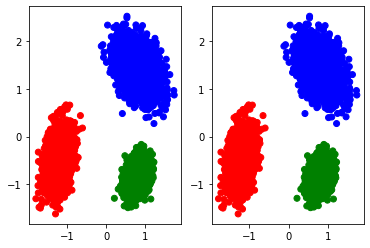

In [19]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)

col_real = []
for i in range(n_obs):
  if data['cluster'][i]== 1 :
    col_real.append('r')
  elif data['cluster'][i] == 2:
    col_real.append('b')
  else :
    col_real.append('g')
ax1.scatter(data['x1'], data['x2'], color=col_real)

col_fitted = []
for i in range(n_obs):
  if fitted_cluster[i]== 1 :
    col_fitted.append('r')
  elif fitted_cluster[i] == 2:
    col_fitted.append('b')
  else :
    col_fitted.append('g')
ax2.scatter(data['x1'], data['x2'], color=col_fitted)

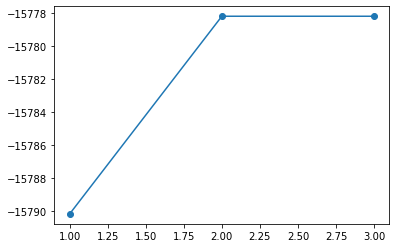

In [20]:
x = list(range(1, iter + 2))
plt.plot(x, log_l[1:(iter+2)], marker='o', linestyle='-')
plt.savefig('likelihood.png', bbox_inches='tight')

In [39]:
#cluster 1
fitted_group_1 = []
for i in range(n_groups):
  if params['groups'][0].flatten().astype(int)[i] == 0:
    fitted_group_1.append(1)
  else :
    fitted_group_1.append(0)

valori = {'True cluster': interc_1,
          'cluster': fitted_group_1}
cluster_group_1 = pd.DataFrame(valori)

X = pd.DataFrame({'cluster': range(len(params['knots'][0])), 'knots': params['knots'][0]})
for i in range(len(params['knots'][0])):
  if range(len(params['knots'][0]))[i] == 0:
    X.iloc[i,0] = 1
  else :
    X.iloc[i,0] = 0
cluster_group_1 =cluster_group_1.merge(X, how='left', on='cluster', sort=False)
cluster_group_1

,True cluster,cluster,knots
0,0,0,-0.253849
1,0,0,-0.253849
2,1,1,1.141461
3,0,0,-0.253849
4,1,1,1.141461
5,0,0,-0.253849
6,0,0,-0.253849
7,1,1,1.141461
8,1,1,1.141461
9,1,1,1.141461


In [111]:
X = pd.DataFrame({'cluster': range(len(params['knots'][0])), 'knots': params['knots'][0]})
Y = pd.DataFrame({'group': data[fitted_cluster==1].groupby('group').count().reset_index()['group'], 'cluster': params['groups'][0].flatten().astype(int)})
Z_0 = Y.merge(X, on=['cluster'])
Z_0

,group,cluster,knots
0,1,1,-0.253849
1,2,1,-0.253849
2,4,1,-0.253849
3,6,1,-0.253849
4,7,1,-0.253849
5,3,0,1.141461
6,5,0,1.141461
7,8,0,1.141461
8,9,0,1.141461
9,10,0,1.141461


In [49]:
#cluster 2
fitted_group_2 = []
for i in range(n_groups):
  if params['groups'][1].flatten().astype(int)[i] == 0:
    fitted_group_2.append(0)
  elif params['groups'][1].flatten().astype(int)[i] == 1:
    fitted_group_2.append(1)
  else :
    fitted_group_2.append(2)

valori = {'True cluster of groups': interc_2,
          'Fitted cluster of groups': fitted_group_2}
cluster_group_2 = pd.DataFrame(valori)

X = pd.DataFrame({'Fitted cluster of groups': range(len(params['knots'][1])), 'knots': params['knots'][1]})
cluster_group_2 =cluster_group_2.merge(X, how='left', on='Fitted cluster of groups', sort=False)
cluster_group_2

,True cluster of groups,Fitted cluster of groups,knots
0,1,1,1.070019
1,0,0,-0.001304
2,0,0,-0.001304
3,2,2,2.143557
4,1,1,1.070019
5,0,0,-0.001304
6,2,2,2.143557
7,0,0,-0.001304
8,0,0,-0.001304
9,0,0,-0.001304


In [112]:
X = pd.DataFrame({'cluster': range(len(params['knots'][1])), 'knots': params['knots'][1]})
Y = pd.DataFrame({'group': data[fitted_cluster==2].groupby('group').count().reset_index()['group'], 'cluster': params['groups'][1].flatten().astype(int)})
Z_1 = Y.merge(X, on=['cluster'])
Z_1

,group,cluster,knots
0,1,1,1.070019
1,5,1,1.070019
2,2,0,-0.001304
3,3,0,-0.001304
4,6,0,-0.001304
5,8,0,-0.001304
6,9,0,-0.001304
7,10,0,-0.001304
8,4,2,2.143557
9,7,2,2.143557


In [52]:
#cluster 3
fitted_group_3 = []
for i in range(n_groups):
  if params['groups'][2].flatten().astype(int)[i] == 0:
    fitted_group_3.append(1)
  elif params['groups'][2].flatten().astype(int)[i] == 1:
    fitted_group_3.append(2)
  else :
    fitted_group_3.append(0)

valori = {'True cluster of groups': interc_3,
          'Fitted cluster of groups': fitted_group_3}
cluster_group_3 = pd.DataFrame(valori)

X = pd.DataFrame({'Fitted cluster of groups': range(len(params['knots'][2])), 'knots': params['knots'][2]})
for i in range(len(params['knots'][2])):
  if range(len(params['knots'][2]))[i] == 0:
    X.iloc[i,0] = 1
  elif range(len(params['knots'][2]))[i] == 1 :
    X.iloc[i,0] = 2
  else :
    X.iloc[i,0] = 0
cluster_group_3 =cluster_group_3.merge(X, how='left', on='Fitted cluster of groups', sort=False)
cluster_group_3

,True cluster of groups,Fitted cluster of groups,knots
0,1,1,1.814312
1,0,0,0.796737
2,2,2,2.837023
3,0,0,0.796737
4,2,2,2.837023
5,1,1,1.814312
6,1,1,1.814312
7,1,1,1.814312
8,1,1,1.814312
9,0,0,0.796737


In [113]:
X = pd.DataFrame({'cluster': range(len(params['knots'][2])), 'knots': params['knots'][2]})
Y = pd.DataFrame({'group': data[fitted_cluster==3].groupby('group').count().reset_index()['group'], 'cluster': params['groups'][2].flatten().astype(int)})
Z_2 = Y.merge(X, on=['cluster'])
Z_2

,group,cluster,knots
0,1,0,1.814312
1,6,0,1.814312
2,7,0,1.814312
3,8,0,1.814312
4,9,0,1.814312
5,2,2,0.796737
6,4,2,0.796737
7,10,2,0.796737
8,3,1,2.837023
9,5,1,2.837023


In [23]:
from sklearn.metrics import roc_curve, auc

In [114]:
from scipy.stats import multinomial
def all_mydmultinom(V, prob, v):
      result = np.zeros(len(V))
      for j in range(len(V)):
        if V.iloc[j] == 1:
          esito = [V.iloc[j], 0]
        else:
          esito = [V.iloc[j], 1]
        result[j] = multinomial.pmf(esito, n=1, p=[prob[0], 1-prob[0]])
      return result

In [115]:
data_pred_1 = data.copy()
data_pred_1 = data_pred_1.merge(Z_0, on=['group'])

data_pred_2 = data.copy()
data_pred_2 = data_pred_2.merge(Z_1, on=['group'])

data_pred_3 = data.copy()
data_pred_3 = data_pred_3.merge(Z_2, on=['group'])

In [116]:
data_pred_1

,group,cluster_x,x1,x2,cat_B,lin_pred,y,cluster_y,knots
0,2,1,-1.124767,-0.487821,1,-0.054405,0,1,-0.253849
1,2,1,-1.146525,-0.551515,0,-2.072443,0,1,-0.253849
2,2,1,-1.265428,-0.551130,0,-2.310404,0,1,-0.253849
3,2,1,-1.331416,-0.543163,1,-0.445566,1,1,-0.253849
4,2,1,-1.385511,-0.009825,0,-2.767091,0,1,-0.253849
...,...,...,...,...,...,...,...,...,...
7495,1,3,0.818441,-0.966238,1,0.058834,1,1,-0.253849
7496,1,3,0.853942,-0.892193,1,-0.024035,0,1,-0.253849
7497,1,3,0.603737,-0.960560,1,0.378618,1,1,-0.253849
7498,1,3,0.686695,-0.705500,0,0.252158,1,1,-0.253849


In [117]:
from scipy.stats import multivariate_normal
w = []
for c in range(3):
    w.append(np.sum(fitted_cluster==(c+1))/len(data['y']))
weight = []
weight.append(w[0]*all_mydmultinom(data_pred_1['cat_B'], params['lam'][0],1)*multivariate_normal.pdf(data_pred_1[['x1','x2']], mean=params['mu'][0], cov=params['sigma'][:, :, 0], allow_singular=True))
weight.append(w[1]*all_mydmultinom(data_pred_2['cat_B'], params['lam'][0],1)*multivariate_normal.pdf(data_pred_2[['x1','x2']], mean=params['mu'][1], cov=params['sigma'][:, :, 1], allow_singular=True))
weight.append(w[2]*all_mydmultinom(data_pred_3['cat_B'], params['lam'][0],1)*multivariate_normal.pdf(data_pred_3[['x1','x2']], mean=params['mu'][2], cov=params['sigma'][:, :, 2], allow_singular=True))


In [118]:
from scipy.special import logit, expit
predicted_probs = []
for i in range(len(data['y'])):
   sum_weight = weight[0][i] + weight[1][i] + weight[2][i]
   val_1 = np.array( data_pred_1['knots'][i] + params['fix_param'][0][0] * data_pred_1['x1'][i] + params['fix_param'][0][1] * data_pred_1['x2'][i] +
              params['fix_param'][0][2] * data_pred_1['cat_B'][i])
   pred_1 = weight[0][i]/sum_weight*np.array(expit(val_1))
   val_2 = np.array( data_pred_2['knots'][i] + params['fix_param'][1][0] * data_pred_2['x1'][i] + params['fix_param'][1][1] * data_pred_2['x2'][i] +
              params['fix_param'][1][2] * data_pred_2['cat_B'][i])
   pred_2 = weight[1][i]/sum_weight*np.array(expit(val_2))
   val_3 = np.array( data_pred_3['knots'][i] + params['fix_param'][2][0] * data_pred_3['x1'][i] + params['fix_param'][2][1] * data_pred_3['x2'][i] +
              params['fix_param'][2][2] * data_pred_3['cat_B'][i])
   pred_3 = weight[2][i]/sum_weight*np.array(expit(val_3))
   predicted_probs.append(pred_1+pred_2+pred_3)

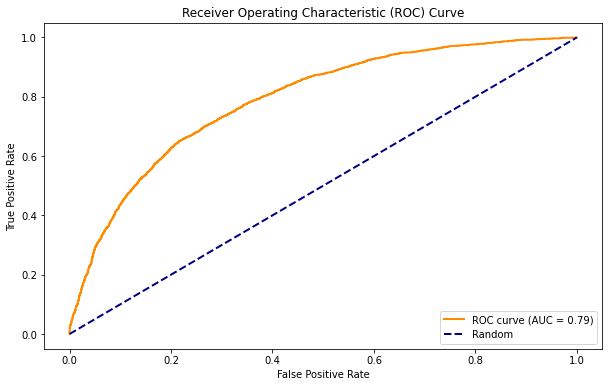

In [119]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(data_pred_1['y'], predicted_probs)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('ROC_simul.png', bbox_inches='tight')
plt.show()

In [120]:
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]
fitted_values = (np.hstack((predicted_probs)) >= optimal_threshold).astype(int)
y_per_prev = np.hstack((data_pred_1['y']))
perc_new = np.count_nonzero(fitted_values == y_per_prev)/len(y_per_prev)
perc_new

0.7276

FITTO UN GLM

In [121]:
import statsmodels.api as sm
data_glm = sm.add_constant(data[['x1','x2','cat_B']])
glm_model = sm.GLM(data['y'], data_glm, family=sm.families.Binomial())
glm_result = glm_model.fit()

In [122]:
fpr, tpr, thresholds_glm = roc_curve(data['y'], glm_result.fittedvalues)
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold_glm = thresholds_glm[optimal_threshold_index]
fitted_glm = (glm_result.fittedvalues >= optimal_threshold_glm).astype(int)

perc_GLM = np.count_nonzero(fitted_glm == data['y'])/len(data['y'])
perc_GLM

0.5594666666666667

FITTO UN GLMER

In [123]:
data.to_csv('data_simul.csv', index=False)

In [124]:
file_path = 'pred_GLMM_simul.csv'
pred_GLMER = pd.read_csv(file_path)
fpr, tpr, thresholds_glmer = roc_curve(data['y'], pred_GLMER['x'])
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold_glmer = thresholds_glmer[optimal_threshold_index]
fitted_glmer = ( list(pred_GLMER['x'])>= optimal_threshold_glmer).astype(int)

perc_GLMER = np.count_nonzero(fitted_glmer == data['y'])/len(data['y'])
perc_GLMER

0.5713333333333334

In [125]:
comp = pd.DataFrame({'Misclassified point - NewModel' : [perc_new],
                    'Misclassified point - GLM' : [perc_GLM],
                    'Misclassified point - GLMER' : [perc_GLMER]})
comp

,Misclassified point - NewModel,Misclassified point - GLM,Misclassified point - GLMER
0,0.7276,0.559467,0.571333


In [ ]:
import pickle
import os

# I tuoi parametri
parametri = {
    'parameters': params,
    'loglikelihood': log_l,
    'z': z,
    # Aggiungi altri parametri se necessario
}

# Imposta il percorso del file
file_path = '/content/parametri_simulazione_1_2_loglSPGLMM.pkl'

# Salvare i parametri in un file con pickle
with open(file_path, 'wb') as file:
    pickle.dump(parametri, file)

In [ ]:
# per leggere i parametri

import pickle

# Imposta il percorso del file
file_path = '/content/parametri_simulazione_1_1_loglSPGLMM.pkl'

# Caricare i parametri da un file con pickle
with open(file_path, 'rb') as file:
    parametri_caricati = pickle.load(file)


In [ ]:
log_l = parametri_caricati['loglikelihood']

In [ ]:
params = parametri_caricati['parameters']

In [ ]:
z = parametri_caricati['z']